
<div style="text-align: center; font-size: 35px;">
     IPL_Analysis
 </div>




```
This notebook explores the IPL 2025 data, providing insightful visual analyses to facilitate easy understanding. It includes handling of null values and focuses on key metrics such as wicket types, top batsmen by runs scored and balls faced, bowling statistics including wides, team-wise scores, and wickets taken by bowlers. Visualizations and summaries are utilized throughout to enhance comprehension of the tournament dynamics.
```

##### Importing library 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
path=r"D:\my_git\ipl_2025_analysis\data\ipl_2025_deliveries.csv"

In [55]:
df=pd.read_csv(path)

### Analysis


In [56]:
df.describe()

,match_id,season,match_no,innings,over,runs_of_bat,extras,wide,legbyes,byes,noballs
count,17246.000000,17246.0,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000,17246.000000
mean,202537.187232,2025.0,37.187232,1.473733,9.480314,1.467935,0.068248,0.038212,0.012061,0.001566,0.004001
std,21.458575,0.0,21.458575,0.501410,5.650300,1.810856,0.336843,0.191713,0.109160,0.039538,0.063128
min,202501.000000,2025.0,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202519.000000,2025.0,19.000000,1.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202537.000000,2025.0,37.000000,1.000000,9.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202556.000000,2025.0,56.000000,2.000000,14.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202574.000000,2025.0,74.000000,4.000000,19.600000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.head(3)

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN


In [65]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'stumped', 'lbw', 'runout', 'retired out',
       'retired hurt', 'hit wicket'], dtype=object)

In [6]:
df.columns

Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17246 entries, 0 to 17245
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17246 non-null  int64  
 1   season            17246 non-null  int64  
 2   phase             17246 non-null  object 
 3   match_no          17246 non-null  int64  
 4   date              17246 non-null  object 
 5   venue             17246 non-null  object 
 6   batting_team      17246 non-null  object 
 7   bowling_team      17246 non-null  object 
 8   innings           17246 non-null  int64  
 9   over              17246 non-null  float64
 10  striker           17246 non-null  object 
 11  bowler            17246 non-null  object 
 12  runs_of_bat       17246 non-null  int64  
 13  extras            17246 non-null  int64  
 14  wide              17246 non-null  int64  
 15  legbyes           17246 non-null  int64  
 16  byes              17246 non-null  int64 

In [8]:
df.isnull().sum()

match_id                0
season                  0
phase                   0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16373
player_dismissed    16373
fielder             16566
dtype: int64

#### wicket Type and count

In [9]:
wickets=df[df['wicket_type'].notnull()]

In [10]:
wickets_count=wickets['wicket_type'].value_counts()

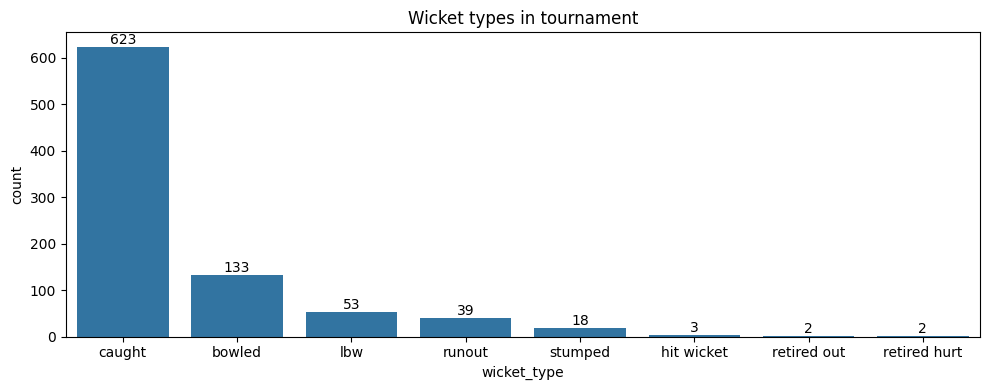

In [11]:
plt.figure(figsize=(10,4))
w_bar=sns.barplot(wickets_count)
for bar in w_bar.patches:
    w_bar.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        int(bar.get_height()),               
        ha='center',                        
        va='bottom'                        
    )
plt.title('Wicket types in tournament')
plt.tight_layout()

#### Maximum run by batsman and ball faced 

In [12]:
max_run=df.groupby("striker")['runs_of_bat'].sum()
ball_faced=df.groupby("striker")['runs_of_bat'].count()


In [13]:
max_run=pd.DataFrame(max_run)
ball_faced=pd.DataFrame(ball_faced)

In [14]:

ball_faced=ball_faced.rename(columns={'runs_of_bat':'ball_faced'})
max_run = max_run.rename(columns={'runs_of_bat': 'total_runs'})

In [15]:

max_run=max_run.sort_values(by="total_runs",ascending=False)

ball_faced=ball_faced.sort_values(by='ball_faced',ascending=False)

In [16]:
ball_faced

,ball_faced
striker,
Sai Sudharsan,509
Kohli,466
Suryakumar Yadav,439
Shubman Gill,432
Mitchell Marsh,400
...,...
Ferguson,1
Livingstone 1 run,1
Karn Sharma,1


In [17]:
pd.concat([ball_faced,max_run],axis=1).head(10)

,ball_faced,total_runs
striker,,
Sai Sudharsan,509,759
Kohli,466,657
Suryakumar Yadav,439,717
Shubman Gill,432,650
Mitchell Marsh,400,627
Prabhsimran,376,599
Rahul,369,546
Shreyas Iyer,359,604
Jaiswal,358,559


In [18]:
pd.concat([max_run, ball_faced],axis=1).head(10)

,total_runs,ball_faced
striker,,
Sai Sudharsan,759,509
Suryakumar Yadav,717,439
Kohli,657,466
Shubman Gill,650,432
Mitchell Marsh,627,400
Shreyas Iyer,604,359
Prabhsimran,599,376
Jaiswal,559,358
Rahul,546,369


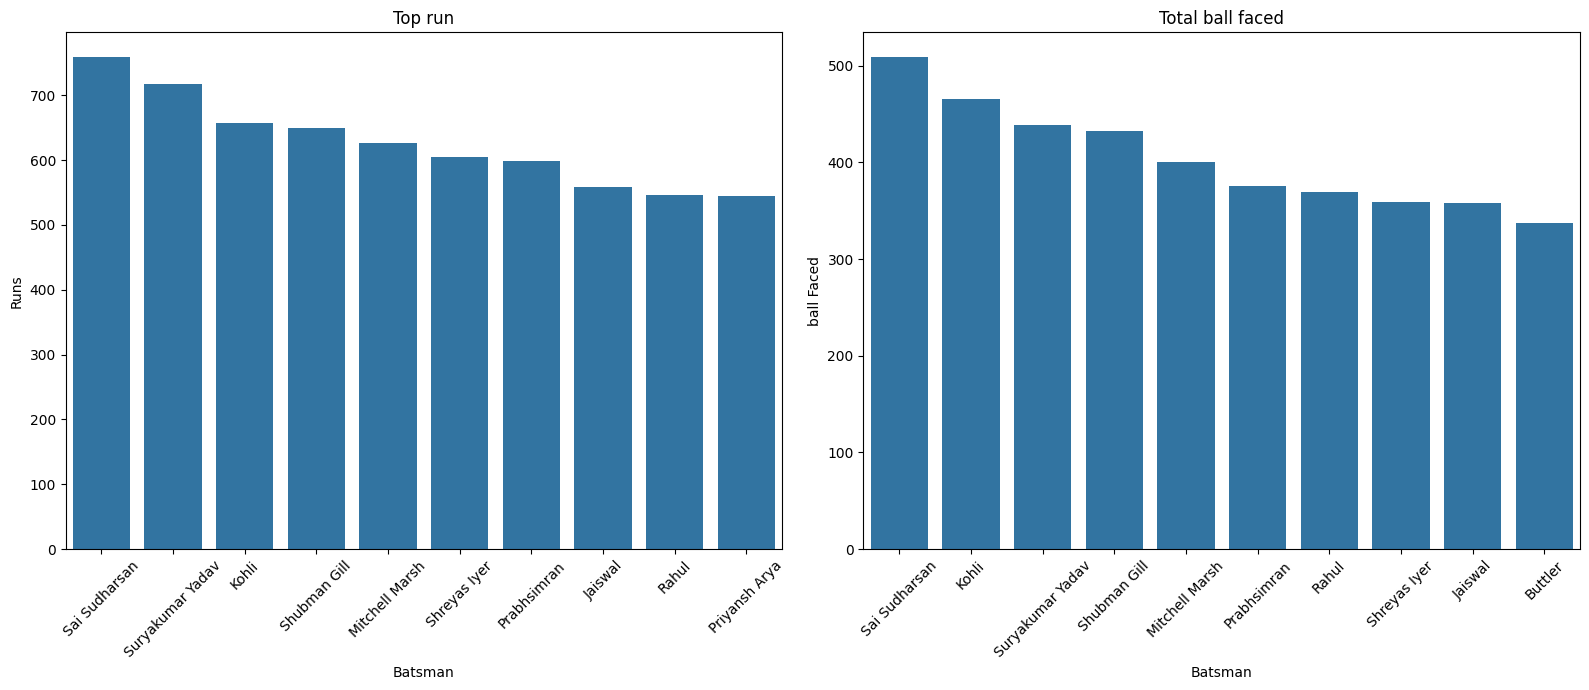

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
sns.barplot(data=max_run.head(10), x="striker",y="total_runs",ax=ax[0])
ax[0].set_xlabel("Batsman")
ax[0].tick_params(axis='x',rotation=45)
ax[0].set_ylabel("Runs")
ax[0].set_title("Top run")
sns.barplot(data=ball_faced.head(10),x='striker',y='ball_faced',ax=ax[1])
ax[1].set_xlabel("Batsman")
ax[1].tick_params(axis='x',rotation=45)
ax[1].set_ylabel("ball Faced")
ax[1].set_title("Total ball faced")
plt.tight_layout()
plt.show()

#### Maximum wide 

In [20]:
max_wide=df.groupby("bowler")["wide"].sum()

In [21]:
max_wide=pd.DataFrame(max_wide).sort_values(by="wide",ascending=False)

In [22]:
max_wide.head()

,wide
bowler,
Pathirana,32
Siraj,22
Tushar Deshpande,19
Sandeep Sharma,17
Harshal Patel,17


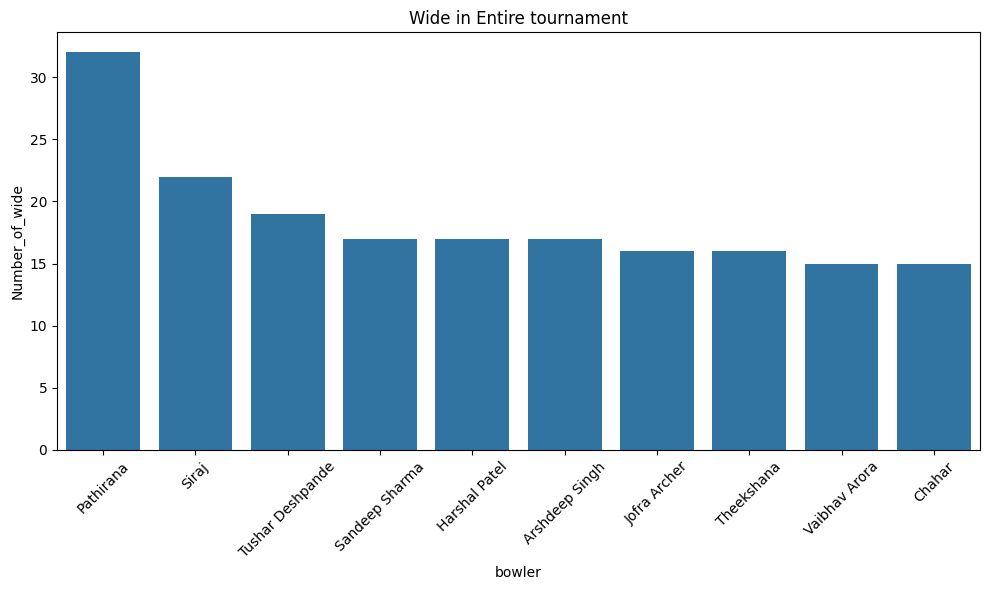

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=max_wide.head(10),x="bowler",y="wide")
plt.title("Wide in Entire tournament")
plt.xlabel("bowler")
plt.ylabel("Number_of_wide")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### CSK 

In [24]:
df["bowling_team"].unique()

array(['RCB', 'KKR', 'RR', 'SRH', 'CSK', 'MI', 'DC', 'LSG', 'GT', 'PBKS'],
      dtype=object)

In [25]:
csk=df[df["bowling_team"]=="CSK"]

In [26]:
csk_max_wide=pd.DataFrame(csk.groupby("bowler")["wide"].sum()).sort_values(by="wide",ascending=False)

In [27]:
csk_max_wide.head(10)

,wide
bowler,
Pathirana,32
Noor Ahmad,11
Khaleel Ahmed,7
Jamie Overton,4
Ashwin,3
Jadeja,3
Sam Curran,2
Hooda,1
Nathan Ellis,1


In [28]:
csk_bat=df[df["batting_team"]=="CSK"]
csk_run=csk_bat.groupby("striker")["runs_of_bat"].sum()
csk_run=pd.DataFrame(csk_run)
csk_run=csk_run.sort_values(by='runs_of_bat',ascending=False)

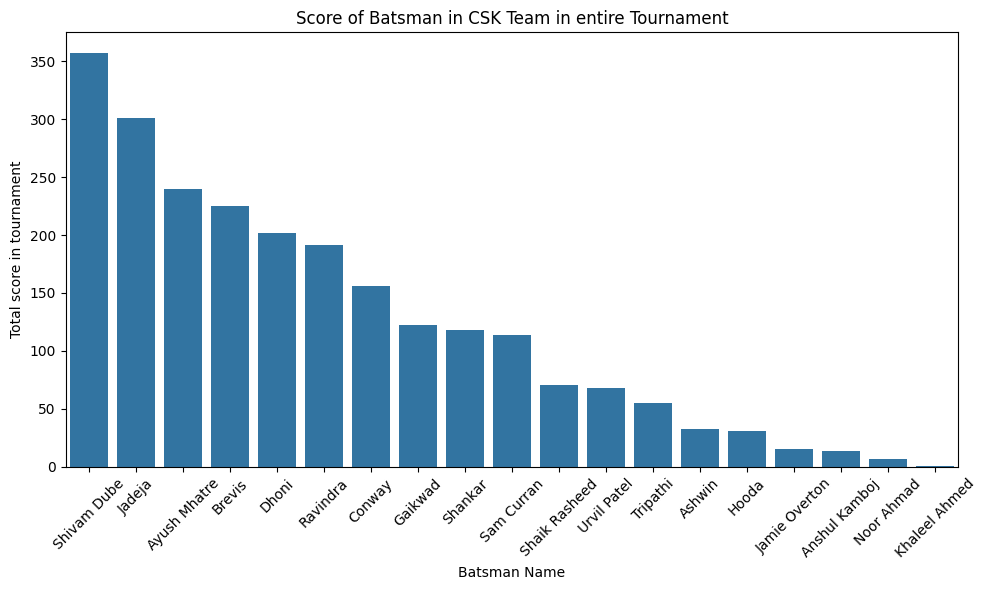

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=csk_run,x="striker",y="runs_of_bat")
plt.title("Score of Batsman in CSK Team in entire Tournament")
plt.xticks(rotation=45)
plt.xlabel("Batsman Name")
plt.ylabel('Total score in tournament')
plt.tight_layout()
plt.show()


In [30]:
csk_wickets=df[(df["bowling_team"]=="CSK") & (df['player_dismissed'].notnull())]

In [31]:
csk_bowler_wicket=pd.DataFrame(csk_wickets.groupby("bowler")['player_dismissed'].count())

In [32]:
csk_bowler_wicket.rename(columns={'player_dismissed': 'wickets'}, inplace=True)
csk_bowler_wicket=csk_bowler_wicket.sort_values(by='wickets',ascending=False)


In [33]:
csk_bowler_wicket.head(10)

,wickets
bowler,
Noor Ahmad,24
Khaleel Ahmed,16
Pathirana,15
Jadeja,10
Anshul Kamboj,8
Ashwin,7
Mukesh Choudhary,1
Nathan Ellis,1
Sam Curran,1


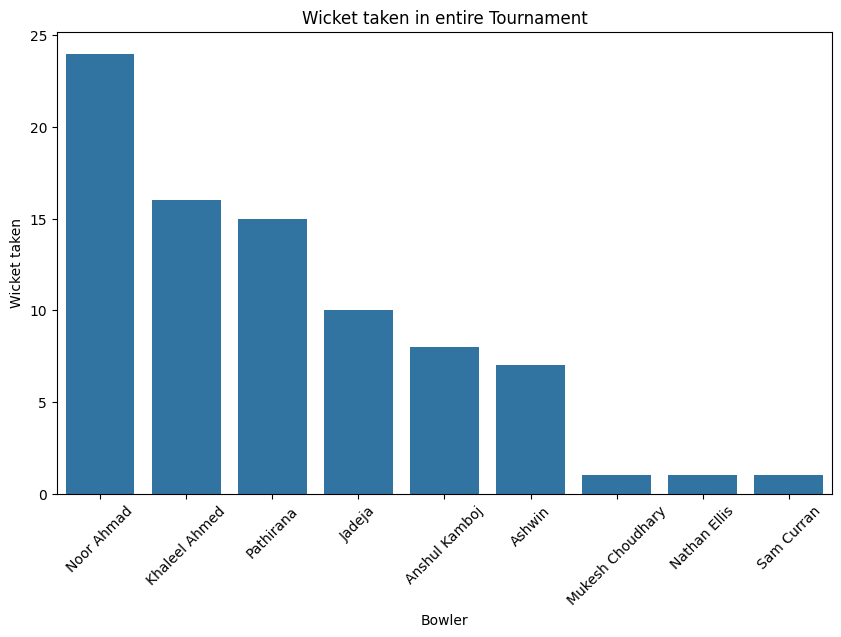

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=csk_bowler_wicket,x="bowler",y='wickets')
plt.xticks(rotation=45)
plt.xlabel('Bowler')
plt.ylabel("Wicket taken")
plt.title("Wicket taken in entire Tournament")
plt.show()


In [35]:
total_bound=csk_bat[csk_bat['runs_of_bat'].isin([4,6])]

In [ ]:
boundaries=total_bound.groupby(['striker','runs_of_bat']).size().unstack().fillna(0)
boundaries.columns=["4s","6s"]
boundaries.astype(int)

,4s,6s
striker,,
Anshul Kamboj,2,0
Ashwin,3,1
Ayush Mhatre,31,11
Brevis,13,17
Conway,17,4
Dhoni,12,13
Gaikwad,14,4
Hooda,2,1
Jadeja,25,10


In [37]:
csk_bat['striker'].unique()

array(['Ravindra', 'Tripathi', 'Gaikwad', 'Shivam Dube', 'Hooda',
       'Sam Curran', 'Jadeja', 'Dhoni', 'Ashwin', 'Noor Ahmad', 'Shankar',
       'Jamie Overton', 'Conway', 'Anshul Kamboj', 'Shaik Rasheed',
       'Ayush Mhatre', 'Brevis', 'Khaleel Ahmed', 'Urvil Patel'],
      dtype=object)

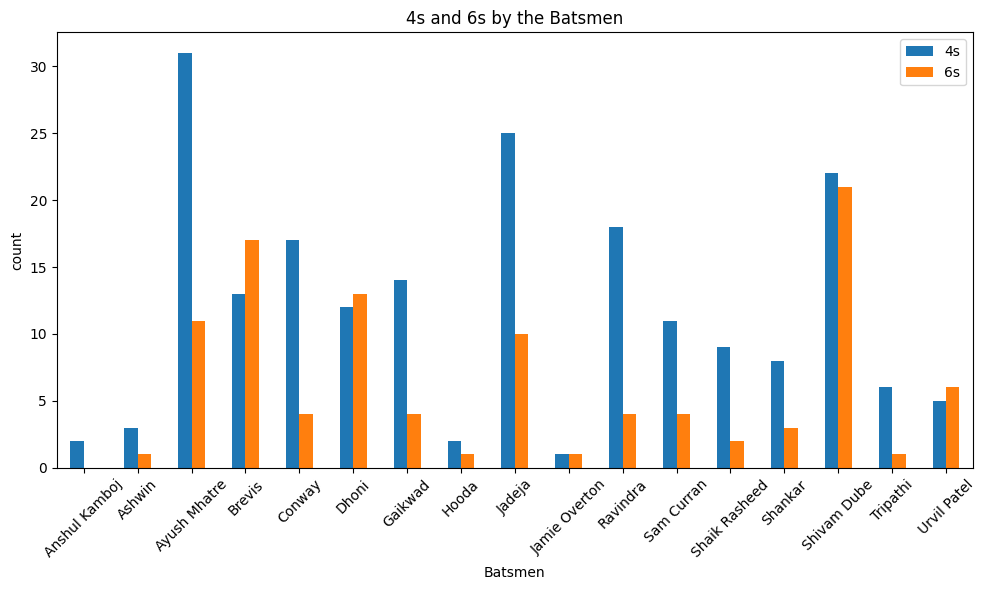

In [38]:
boundaries.plot(kind='bar',figsize=(10,6))
plt.title("4s and 6s by the Batsmen")
plt.xlabel("Batsmen")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Each Team total score 

In [39]:
df['total_run']=df['runs_of_bat']+df['extras']
team_total=df.groupby('batting_team')['total_run'].sum()

In [40]:
team_total=pd.DataFrame(team_total).sort_values(by='total_run',ascending=False)


In [41]:
team_colors = {
    'RCB': '#D50032',
    'KKR': '#4B2153',
    'RR': '#004C93',
    'SRH': '#F05A28',
    'CSK': '#FAD201',
    'MI': '#004BA0',
    'DC': '#004C93',
    'LSG': '#F5D547',
    'GT': '#008080',
    'PBKS': '#E41D44'
}

C:\Users\briyani\AppData\Local\Temp\ipykernel_4780\2376971985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(data=team_total,x="batting_team",y='total_run',palette=team_colors)


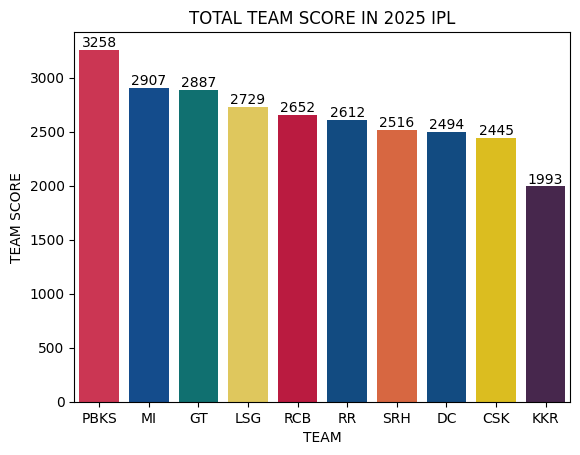

In [42]:
barplot=sns.barplot(data=team_total,x="batting_team",y='total_run',palette=team_colors)
for bar in barplot.patches:
    barplot.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        int(bar.get_height()),               
        ha='center',                        
        va='bottom'                        
    )
plt.xlabel("TEAM")
plt.ylabel("TEAM SCORE")
plt.title("TOTAL TEAM SCORE IN 2025 IPL")
plt.show()

In [43]:
max_noball=pd.DataFrame(df.groupby("bowler")["noballs"].sum()).sort_values(by="noballs",ascending=False)

#### wicket taken by bowlers

In [44]:
wickets_taken=df[df['player_dismissed'].notnull()]

In [45]:
wickets_by_bowler=pd.DataFrame((wickets_taken.groupby(['bowler','bowling_team'])['player_dismissed']
                   .count())).reset_index().rename(columns={'player_dismissed':'wickets'})


In [46]:
wickets_by_bowler=wickets_by_bowler.sort_values(by='wickets',ascending=False)

In [47]:
top_wicket=wickets_by_bowler.head(10)

In [48]:
top_wicket

,bowler,bowling_team,wickets
69,Prasidh,GT,26
66,Noor Ahmad,CSK,24
15,Boult,MI,23
6,Arshdeep Singh,PBKS,22
32,Hazlewood,RCB,22
16,Bumrah,MI,21
98,Vaibhav Arora,KKR,19
79,Sai Kishore,GT,19
14,Bhuvneshwar,RCB,18
42,Krunal Pandya,RCB,17


In [49]:
top_wicket['team_color']=top_wicket['bowling_team'].map(team_colors)

C:\Users\briyani\AppData\Local\Temp\ipykernel_4780\1668027428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_wicket['team_color']=top_wicket['bowling_team'].map(team_colors)


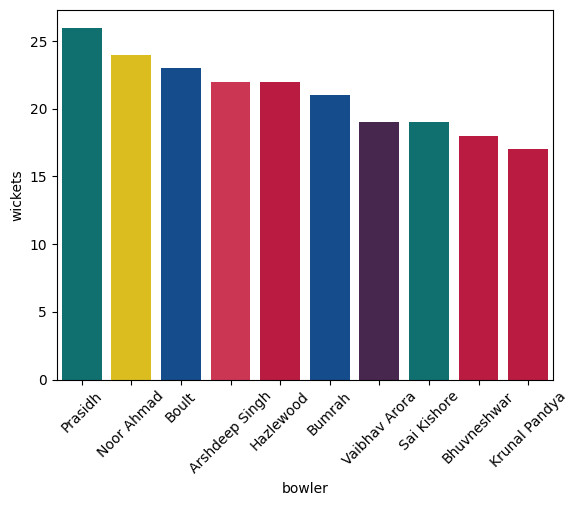

In [50]:

sns.barplot(data=top_wicket.head(10),x="bowler",y="wickets",hue='bowling_team',palette=team_colors)
plt.xticks(rotation=45)
plt.legend().remove()
plt.show()

In [51]:
max_noball

,noballs
bowler,
Harshal Patel,4
Yash Dayal,4
Vipraj Nigam,4
Mitchell Starc,4
Russell,3
...,...
Abhishek Sharma,0
Mukesh Choudhary,0
Mujeeb,0
